In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
#Fetch Images count from Fodlers
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

.ipynb_checkpoints Folder has 0 Images
Daisy Folder has 764 Images
Dandeliean Folder has 1052 Images
Rose Folder has 784 Images
SunFlower Folder has 733 Images
Tulip Folder has 0 Images
Images Folder has 3333 Images


In [3]:
#Load Images into Arrays as Dataset
base_dir = 'Images/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3333 files belonging to 5 classes.
Using 2667 files for training.
Found 3333 files belonging to 5 classes.
Using 666 files for validation.


In [5]:
flower_names = train_ds.class_names
flower_names

['Daisy', 'Dandeliean', 'Rose', 'SunFlower', 'Tulip']

In [6]:
import matplotlib.pyplot as plt

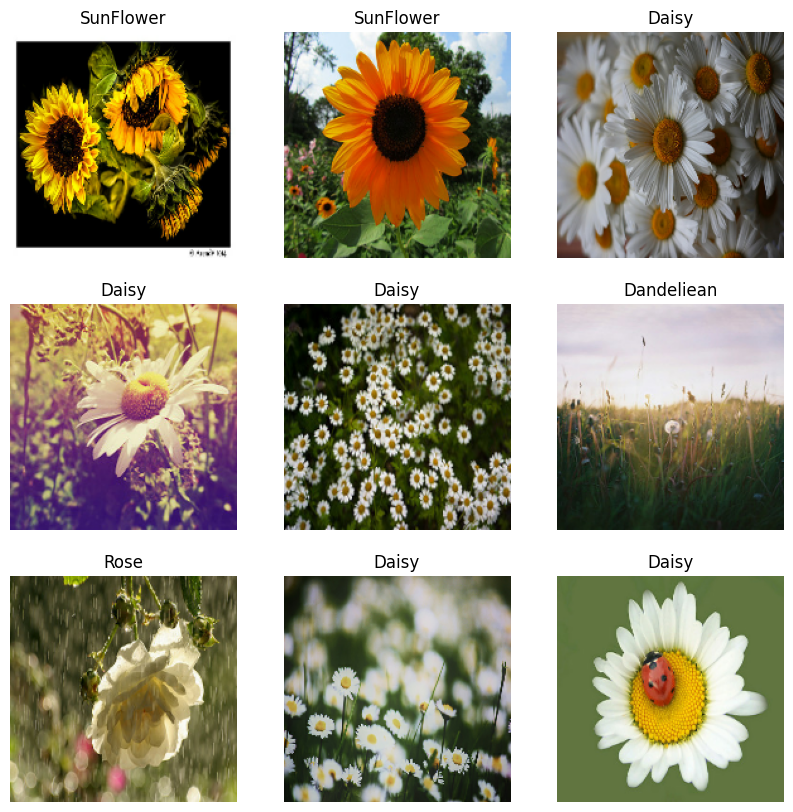

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\anshk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


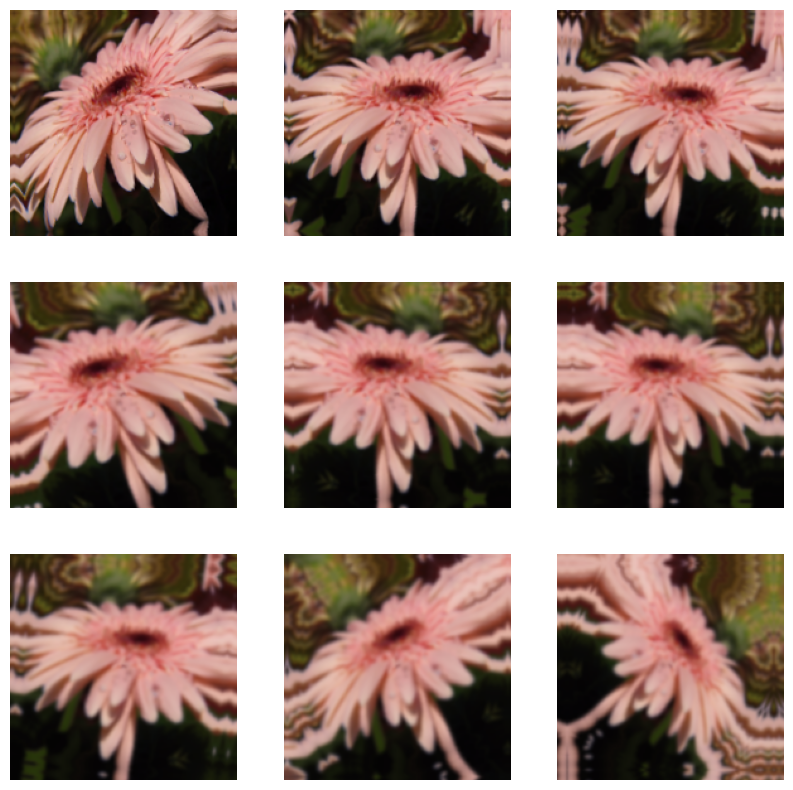

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [18]:
#MOdel Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 286ms/step - accuracy: 0.3817 - loss: 1.4411 - val_accuracy: 0.6051 - val_loss: 0.9216
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 24s 290ms/step - accuracy: 0.6297 - loss: 0.8989 - val_accuracy: 0.6607 - val_loss: 0.8995
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 337ms/step - accuracy: 0.6651 - loss: 0.8333 - val_accuracy: 0.6892 - val_loss: 0.8238
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 314ms/step - accuracy: 0.6985 - loss: 0.7679 - val_accuracy: 0.7312 - val_loss: 0.7317
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.7521 - loss: 0.6538 - val_accuracy: 0.7387 - val_loss: 0.6930
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 265ms/step - accuracy: 0.7529 - loss: 0.6428 - val_accuracy: 0.7793 - val_loss: 0.6194
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - accuracy: 0.7800 - loss: 0.5908 - val_accuracy: 0.7688 - val_loss: 0.6210
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 32s 388ms/step - accuracy: 0.7848 - loss: 0.5568 - val_accu

In [22]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [24]:
classify_images('Images/OIP.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


'The Image belongs to Rose with a score of 99.44292306900024'

In [30]:
import ipywidgets as widgets
from IPython.display import display, Javascript

# Function to save the notebook
def save_notebook():
    display(Javascript('IPython.notebook.save_checkpoint();'))

# Button to trigger notebook saving
save_button = widgets.Button(description="Save Notebook")
save_button.on_click(lambda b: save_notebook())

display(save_button)


Button(description='Save Notebook', style=ButtonStyle())